In [17]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
dirs = [
    'lens_on.dir',
    'lens_off.dir']

files = [
    '01.Mesh-0-0.csv',
    '10.Mesh-0-0.csv',
    '11.Mesh-0-0.csv']

In [49]:
dir_ = dirs[0]
file_ = files[0]

def read_data(dir_, file_):
    with open('%s/%s' % (dir_, file_), 'r') as f:
        data = f.read().replace(' ', '')
        sdata = data.split('\n')[3:]
        with open('.tmp.tmp', 'w') as g:
            g.write('\n'.join(sdata))
        df = pd.read_csv('.tmp.tmp', names=['z', '_', 'r', 'dE', '__', 'N'])
        df = df[['z', 'r', 'dE']]
        df['dE'] /= df['dE'].max()

    df = df[df['z'] <= 17]

    n = len(df[~df['z'].duplicated()])
    m = len(df[~df['r'].duplicated()])
    mx = df['dE'].values.reshape((n, m))
    
    return df, mx

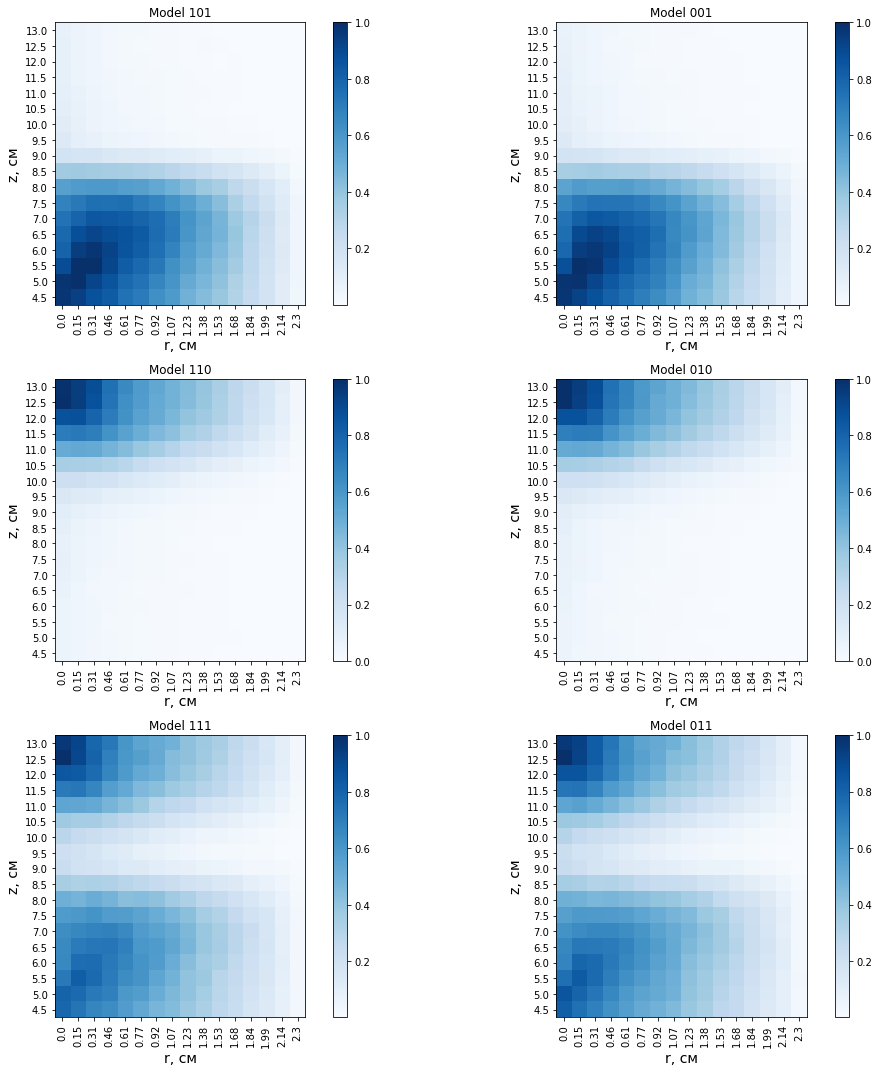

In [58]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for j, dir_ in enumerate(dirs):
    for i, file_ in enumerate(files):
        df, mx = read_data(dir_, file_)
        
        mx = mx.T[::-1].T
        
        r_min = 0
        r_max = 2.45

        z_min = 4.5
        z_max = 15.5 - 2

        dr = (r_max - r_min) / len(df[~df['r'].duplicated()])
        dz = (z_max - z_min) / len(df[~df['z'].duplicated()])

        x_ticks = np.arange(len(df[~df['r'].duplicated()]['r']))
        y_ticks = np.arange(len(df[~df['z'].duplicated()]['z']))[::-1]

        x_labels = r_min + np.around(df[~df['r'].duplicated()]['r'].values * dr, decimals=2)
        y_labels = z_min + np.around(df[~df['z'].duplicated()]['z'].values * dz, decimals=2)

        title = 'Model %s%s' % (str(int('on' in dir_)), file_.split('.')[0])

        pos = axs[i, j].imshow(mx[::-1], cmap='Blues')
        fig.colorbar(pos, ax=axs[i,j])

        axs[i, j].set_title(title)

        axs[i, j].set_xlabel('r, см', fontsize=14)
        axs[i, j].set_ylabel('z, см', fontsize=14)

        axs[i, j].set_xticks(x_ticks)
        axs[i, j].set_xticklabels(x_labels, rotation='vertical')

        axs[i, j].set_yticks(y_ticks)
        axs[i, j].set_yticklabels(y_labels)

        # fig[0, 0].suptitle('This is a somewhat long figure title', fontsize=16)

fig.tight_layout()
plt.show()
fig.savefig('Dn(r, z).jpeg')

In [48]:
df[~df['z'].duplicated()]

z  r        dE
0     0  0  0.029762
16    1  0  0.030973
32    2  0  0.035731
48    3  0  0.031540
64    4  0  0.029681
80    5  0  0.026036
96    6  0  0.027015
112   7  0  0.025364
128   8  0  0.013428
144   9  0  0.001000
160  10  0  0.000916
176  11  0  0.002016
192  12  0  0.007702
208  13  0  0.013274
224  14  0  0.019931
240  15  0  0.027950
256  16  0  0.029576
272  17  0  0.028434
288  18  0  0.026080
304  19  0  0.026121
320  20  0  0.028887
336  21  0  0.033626